<a id="top"></a>  
# Heart Disease UCI - EDA and ML w/LR
---

**Heart Disease UCI** is a small dataset containing 14 attributes, and is very useful in learning how to prepare data in order to produce meaningful plots and perform to machine learning.  This project will cover:

-  data preperation, primarily feature engineering
-  explanation of the data
-  exploratory data analysis - plots, plots and more plots
-  machine learning using Logistic Regression
-  evaluation of the model

---
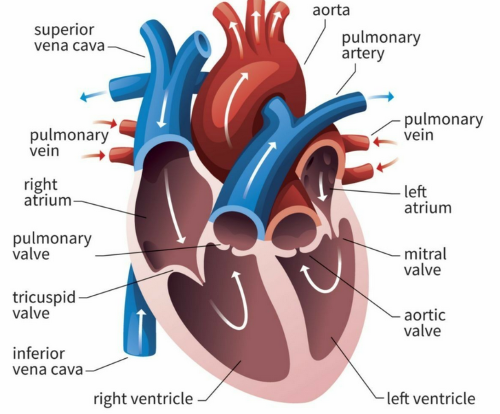

---
### Table Of Content
1. [Data Collection](#coll)   
2. [Data Preparation](#prep)   
      2.1 [Check for NULLs/Duplicates](#prep_null)   
      2.2 [Feature Engineering (rename attributes and features)](#prep_name) 
3. [Understanding the Data](#data)   
      3.1 [Data Types](#data_type)   
      3.2 [Statistical Summary](#data_summ)   
      3.3 [Types of Data (categorical/numeric)](#data_type2)   
4. [Exploratory Data Analysis](#eda)   
      4.1 [Plot Categorical Data](#eda_cat)   
      4.2 [Plot Numeric Data](#eda_num)   
5. [Model - Logistic Regression](#model)   
      5.1 [One Hot Encoding](#model_oneH)   
      5.2 [Normalize Data](#model_norm)   
      5.3 [Correlation](#model_corr)   
      5.4 [Train/Test Split](#model_split)   
      5.5 [Classification Model - Logistic Regression](#model_lr)   
6. [Evaluate the Model](#eval)   
      6.1 [Cross-Validation Score](#eval_cv)   
      6.2 [Accuracy Score/Jaccard Index](#eval_acc)   
      6.3 [F1 Score](#eval_f1)   
      6.4 [Confusion Matrix](#eval_conf)   
      6.5 [Receiver Operating Characteristics (ROC) Curve](#eval_roc)   
      6.6 [Classification Report](#eval_class)   
      6.7 [Log Loss](#eval_log) 
--- 
<div class="alert alert-block alert-info">
<b>NOTE:</b>  I wanted to use subplot with a FOR loop for categorical and numeric data, so I went a little crazy with the plotting in Section 4  :-)</div>

---
#  1.  Data Collection <a id="coll"></a>
Import Python libraries and load the dataset.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

In [ ]:
df = pd.read_csv('../input/heart.csv')
df.shape

[go to top of document](#top)     

---
#  2.  Data Preparation <a id="prep"></a>

## 2.1 Check for NULLs/Duplicates <a id="prep_null"></a>
Cleaning up the NULL and duplicate values in the dataset.

In [ ]:
#  check for NULL values
print('\n--- NULL count ---\n{}'.format(df.isnull().sum()))
#df.dropna(inplace=True)             #  drop NULLs

#  check for DUPLICATES
print('\n1st DUPLICATE count:\t{}'.format(df.duplicated().sum()))
df.drop_duplicates(inplace = True)  #  drop duplitcates
print('2nd DUPLICATE count:\t{}'.format(df.duplicated().sum()))

## 2.2 Feature Engineering <a id="prep_name"></a>
Rename columns (attributes) for better readability.

| Original Attribute Name | New Attribute Name   |  Description |
| :-- | :--  | :--- |
|**age**|age|age of patient
|**sex**|sex|sex of patient:  0 = female; 1 = male
|**cp**|chest_pain_type|chest pain type (4 values)
|**trestbps**|resting_blood_pressure|resting blood pressure
|**chol**|cholestoral|serum cholestoral in mg/dl
|**fbs**|fasting_blood_sugar|fasting blood sugar > 120 mg/dl
|**restecg**|resting_electrocardiographic|resting electrocardiographic results (values 0,1,2)
|**thalach**|maximum_heart_rate|maximum heart rate achieved
|**exang**|exercise_induced_angina|exercise induced angina
|**oldpeak**|ST_depression|oldpeak = ST depression induced by exercise relative to rest
|**slope**|slope_peak_exercise_ST|slope of the peak exercise ST segment
|**ca**|number_of_major_vessels|number of major vessels (0-3) colored by flourosopy
|**thal**|thal|thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

In [ ]:
df.rename(columns={
        'cp':'chest_pain_type', 'trestbps':'resting_blood_pressure',
        'chol':'cholestoral','fbs':'fasting_blood_sugar',
        'restecg':'resting_electrocardiographic','thalach':'maximum_heart_rate',
        'exang':'exercise_induced_angina','oldpeak':'ST_depression',
        'slope':'slope_peak_exercise_ST','ca':'number_of_major_vessels'},
    inplace=True)

print(df.columns.tolist())

**Update categorical attribute values (features) for better readability & plotting.**

| Attribute   | Updated Feature Values 
| :-- | :-- 
|**sex** |0:female<br>1:male|
|**chest_pain_type** | 0:typical angina<br>1:atypical angina<br><br>2:non-anginal<br>3:asymptomatic|
|**fasting_blood_sugar** |0:> 120 mg/dl<br>1:< 120 mg/dl|
|**resting_electrocardiographic** |0:normal<br>1:ST-T wave abnormality<br>2:ventricular hypertrophy|
|**exercise_induced_angina** |0:no<br>1:yes|
|**slope_peak_exercise_ST** |0:upsloping<br>1:flat<br>2:downsloping|
|**thal** |0:normal 0<br>1:normal 1<br>2:fixed defect<br>3:reversable defect|
|**target** |0:no disease<br>1:disease|

In [ ]:
df['sex'] = df['sex'].map({0:'female', 1:'male'})
df['chest_pain_type'] = df['chest_pain_type'].map({
        0:'typical angina', 1:'atypical angina',
        2:'non-anginal',    3:'asymptomatic'})
df['fasting_blood_sugar'] = df['fasting_blood_sugar'].map({
        0:'> 120 mg/dl', 1:'< 120 mg/dl'})
df['resting_electrocardiographic'] = df['resting_electrocardiographic'].map({
        0:'normal', 1:'ST-T wave abnormality', 2:'ventricular hypertrophy'})
df['exercise_induced_angina'] = df['exercise_induced_angina'].map({
        0:'no', 1:'yes'})
df['slope_peak_exercise_ST'] = df['slope_peak_exercise_ST'].map({
        0:'upsloping', 1:'flat', 2:'downsloping'})
df['thal'] = df['thal'].map({
        0:'normal 0',     1:'normal 1',
        2:'fixed defect', 3:'reversable defect'})
df['target'] = df['target'].map({0:'no disease', 1:'disease'})

df.head()

[go to top of document](#top)     

---
#  3.  Understanding the Data <a id="data"></a>

##  3.1  Data Types   <a id="data_type"></a>
Some of the data types of the features will be changed to 'object' after rename/updates.

In [ ]:
print(df.info())         #  dataset size and types
print('\nData Shape:  {}'.format(df.shape))

##  3.2  Statistical Summary <a id="data_summ"></a>
Summarize descriptive statistics of the dataset for *numerical* and *categorical* features. 

**Statistical Summary - NUMERICAL DATA**   
Summarize the central tendency, dispersion and shape of numeric features, excluding categorical and NaN values.

In [ ]:
df.describe()   #  NUMERICAL DATA

**Statistical Summary - CATEGORICAL DATA**   
Summarize the count, uniqueness and frequency of categorical features, excluding numerical values.

In [ ]:
df.describe(include=['O'])   #  CATEGORICAL DATA

##  3.3  Types of Data <a id="data_type2"></a>
Separate out the **Categorical** and **Numeric** data.

In [ ]:
df.head()

Following code will separate out catergorical and numerical data. *number_of_major_vessels* has the most discrete unique values (5)...any column with more than "5" unique values is considered a numeric value.

In [ ]:
#  Separate out Categorical and Numeric data
colCAT = []
colNUM = []
for i in df.columns:
    if (len(df[i].unique())) > 5:
        colNUM.append(i)
    else:
        colCAT.append(i)
    print('unique values:  {}\t{}'.format(len(df[i].unique()),i))

dataCAT = df[colCAT]     #  Categorical columns
colNUM.append('target')  #  add target column to Numeric
dataNUM = df[colNUM]     #  Numeric columns

 **TABLE for Categorical and Numeric Data**
 
| CATEGORICAL ATTRIBUTES   | NUMERIC ATTRIBUTES    |
| :-- | :-- |
|sex   |age  |
|chest_pain_type  |resting_blood_pressure  |
|fasting_blood_sugar  |cholestoral  |
|resting_electrocardiographic  |maximum_heart_rate  |
|exercise_induced_angina  |ST_depression  |
|slope_peak_exercise_ST  |  |
|number_of_major_vessels  |  |
|thal  |  |
|target  |  |



[go to top of document](#top)     

---
#  4. Exploratory Data Analysis <a id="eda"></a>
Data can be plotted now that the attributes have been separated into categorical and numeric dataframes, and attributes and feature values have been renamed/updated for easier readability.

The subplots will have three plots per attribute: 
  - `plot#1`:  **OVERALL**
  - `plot#2`:  **NO DISEASE**
  - `plot#3`:  **DISEASE**

As noted above, this section has way too many plots.  Intent was to plot everything using subplots inside FOR loops for kicks. You can go to the next section by clicking [here](#model).

## 4.1  Plots - Categorical Data<a id="eda_cat"></a>
Categorical data can be plotted using Seaborn's **swarmplot**.

In [ ]:
dataCAT.head()  # categorical dataframe from Section 3.3

In [ ]:
diseaseCAT    = df[(df['target'] == 'disease')]
no_diseaseCAT = df[(df['target'] == 'no disease')]

#  fig.add_subplot([# of rows] by [# of columns] by [plot#])
subNumOfRow = len(dataCAT.columns)
subNumOfCol = 3     # three columns: overall, no disease, disease
subPlotNum  = 1     # initialize plot number

fig = plt.figure(figsize=(16,60))

for i in colCAT:
    # overall
    fig.add_subplot(subNumOfRow, subNumOfCol, subPlotNum)
    plt.title('OVERALL - {}'.format(i), fontsize=14)
    plt.xlabel(i, fontsize=12)
    sns.swarmplot(data=df, x=df[i],y=df.age,hue=df.target)
    subPlotNum = subPlotNum + 1
    # no_diseaseCAT
    fig.add_subplot(subNumOfRow, subNumOfCol, subPlotNum)
    plt.title('NO DISEASE, target = 0', fontsize=14)
    plt.xlabel(i, fontsize=12)
    sns.swarmplot(data=no_diseaseCAT, x=no_diseaseCAT[i],y=no_diseaseCAT.age,color='darkorange')
    subPlotNum = subPlotNum + 1
    # diseaseCAT
    fig.add_subplot(subNumOfRow, subNumOfCol, subPlotNum)
    plt.title('DISEASE, target = 1', fontsize=14)
    plt.xlabel(i, fontsize=12)
    #sns.countplot(diseaseCAT[i], hue=df.sex)#,color='darkred')
    sns.swarmplot(data=diseaseCAT, x=diseaseCAT[i],y=diseaseCAT.age,color='blue')
    subPlotNum = subPlotNum + 1
plt.show()

### OBSERVATIONS:

-  **sex** - data has more male population with no heart disease than female, however, the population of patients with heart disease is almost the same, with the female population spread over a longer age range.
-  **chest_pain_type** - typical angina accounts for most cases with no heart disease.  Populations with anything other than typical angina have a higher chance of having heart disease.
-  **fasting_blood_sugar** - is not a good indicator of heart disease since healthy and unhealthy population distribution is almost the same.
-  **resting_electrocardiographic** - is not a good indicator of heart disease since healthy and unhealthy population distribution is almost the same.  
-  **exercise_induced_angina** - is not a good indicator of heart disease since healthy and unhealthy population distribution is almost the same.  
-  **slope_peak_exercise_ST** - populations with downsloping and flat sloping have a higher incidence of heart disease.
-  **number_of_major_vessels** - patients with no vessels colored by fluoroscopy have a much higher incidence of heart disease.
-  **thal** - patients with fixed defect have a significantly higher incidence of heart disease.

## 4.2  Plots - Numeric Data<a id="eda_num"></a>
Numeric data can be plotted using Seaborn's **distplot**.

In [ ]:
dataNUM.head()  # numeric dataframe from Section 3.3

In [ ]:
#  assign NUM dataframe for "no disease" and "disease"
no_diseaseNUM = dataNUM[(df['target'] == 'no disease')]
diseaseNUM    = dataNUM[(df['target'] == 'disease')]

#  fig.add_subplot([# of rows] by [# of columns] by [plot#])
subNumOfRow = len(dataNUM.columns)-1   #  x='age' in plots, drop column
subNumOfCol = 3     # three columns: overall, no disease, disease
subPlotNum  = 1     # initialize plot number

fig = plt.figure(figsize=(16,30))

for i in dataNUM.columns.drop(["age","target"]):
    # overall
    fig.add_subplot(subNumOfRow, subNumOfCol, subPlotNum)
    plt.title('OVERALL', fontsize=14)
    plt.xlabel(i, fontsize=12)
    sns.distplot(df[i],color='black')
    subPlotNum = subPlotNum + 1
    # no_diseaseNUM
    fig.add_subplot(subNumOfRow, subNumOfCol, subPlotNum)
    plt.title('NO DISEASE, target = 0', fontsize=14)
    plt.xlabel(i, fontsize=12)
    sns.distplot(no_diseaseNUM[i],color='darkorange')
    subPlotNum = subPlotNum + 1
    # diseaseNUM
    fig.add_subplot(subNumOfRow, subNumOfCol, subPlotNum)
    plt.title('DISEASE, target = 1', fontsize=14)
    plt.xlabel(i, fontsize=12)
    sns.distplot(diseaseNUM[i],color='darkblue')
    subPlotNum = subPlotNum + 1

plt.show()

### OBSERVATIONS:

-  There are no discernible patterns from the plots between blood pressure, cholesterol, max heartbeat, ST depression and heart disease with respect to age & sex.
-  [Correlation](#model_corr) will give us better understanding of the relationships between the attributes and heart disease.

[go to top of document](#top)     

---
#  5.  Model - Logistic Regression<a id="model"></a>

##  5.1  One Hot Encoding <a id="model_oneH"></a>
Machine learning algorithms cannot process categorical or text data unless they have been converted to numbers.  **One hot encoding** maps categorical values to integer values, which are represented as a binary vector that are all zero values, except the index of the integer, which is set to 1.

In [ ]:
#  one hot encoding works on type 'object'
for i in colCAT:
    df[i] = df[i].astype(object)
    
df_OHE = df[colCAT]               #  dataframe with categorical values
df_OHE = pd.get_dummies(df_OHE)   #  one-hot encoding
df_OHE = df_OHE.join(df[colNUM])  #  add numeric columns

#  change target data to 0/1
df_OHE['target'] = df_OHE['target'].map({'no disease':0,'disease':1})
df_OHE = df_OHE.drop(['target_disease', 'target_no disease'], axis=1)

df_OHE.head()

##  5.2  Normalize Data <a id="model_norm"></a>
Normalization is a rescaling of the data from the original range so that all values are within a certain range, typically between 0 and 1.  Normalized data is essential in machine learning.  Correlation and models will not produce good results if the scales are not standardized.

Using **MixMaxScalar** to keep the 'sex' columns as '0' and '1'.  **StandardScaler** converts the 'sex' columns as -0.68 & 1.46 for female and -1.46 & 0.68 for male.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler().fit_transform(df_OHE)
norm[0:2]

Finally, create the dataframe that can be used for machine learning with the One Hot Encoding and Normalized data.

In [ ]:
#  dataframe with the One Hot Encoding and Normalized data
df = pd.DataFrame(norm, index=df_OHE.index, columns=df_OHE.columns)
df.head()

The original dataframe (**df**) now had One Hot Encoding and Normalized data and is ready for machine learning.

##  5.3 CORRELATION <a id="model_corr"></a>
Keeping in mind that males and females can have different factors resulting in heart disease (see Section 4 observations), this correlation section will have three parts:

   *  Correlation OVERALL - heatmap, table, barplot
   *  Correlation FEMALE  - barplot
   *  Correlation MALE    - barplot

NOTE: barplots conveys the correlation information the best.  Heatmap and table can be excluded, however, I'm doing them for OVERALL data.

###  5.3.1  Correlation - OVERALL

**HEATMAP - OVERALL**   
Heatmaps are a great way of representing correlation visually.  However, due to the amount of attributes in the dataframe, it looks very cluttered.

In [ ]:
dataCorr = df.corr()
plt.figure(figsize=(20,20))
plt.title('Heart Disease - CORRELATION, Overall', fontsize=14)
sns.heatmap(dataCorr, annot=True, fmt='.2f', square=True, cmap = 'Blues_r')

**TABLE - OVERALL**   
Table with the sorted 'target' data provides a better format for understanding heart disease correlation.

In [ ]:
corrALL = dataCorr['target'].sort_values(ascending=False)
corrALL = corrALL.drop(['target'])
corrALL.to_frame()

**BARPLOT - OVERALL**   
Barplot provides the best visualization for the correlation.

In [ ]:
plt.figure(figsize=(16,16))
plt.title('Heart Disease - CORRELATION, Overall', fontsize=14)
ax = sns.barplot(y=corrALL.index,x=corrALL.values)
for p in ax.patches:
    ax.annotate("%.4f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y()))
plt.show()

###  5.3.2  Correlation - FEMALE
Step for creating the correlation **Barplot for FEMALE**

1.  Select 'sex_female' = 1 data
2.  Drop 'sex_female' and 'sex_male' attributes and take correlation
3.  Sort on 'target' column
4.  Drop 'target' column
5.  Plot bar for 'sex_female'

In [ ]:
dataFemale = df[(df['sex_female'] == 1)]
dataFemaleCorr = dataFemale.drop(['sex_female','sex_male'], axis=1).corr()
dataFemaleCorr = dataFemaleCorr['target'].sort_values(ascending=False)
dataFemaleCorr['number_of_major_vessels_4'] = 0  # -7.9e-17  all numbers will be exp if not set to 0
dataFemaleCorr.to_frame()
dataFemaleCorr = dataFemaleCorr.drop(['target'])  # for barplot

plt.figure(figsize=(16,16))
plt.title('Heart Disease - CORRELATION, Female', fontsize=14)
ax = sns.barplot(y=dataFemaleCorr.index,x=dataFemaleCorr.values)
for p in ax.patches:
    ax.annotate("%.4f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y()))
plt.show()

###  5.3.3  Correlation - MALE
Step for creating the correlation the **Barplot for MALE**

1.  Select 'sex_male' = 1 data
2.  Drop 'sex_female' and 'sex_male' attributes and take correlation
3.  Sort on 'target' column
4.  Drop 'target' column
5.  Plot bar for 'sex_female'

In [ ]:
dataMale   = df[(df['sex_male'] == 1)]
dataMaleCorr = dataMale.drop(['sex_female','sex_male'], axis=1).corr()
dataMaleCorr = dataMaleCorr['target'].sort_values(ascending=False)
dataMaleCorr = dataMaleCorr.drop(['target'])

plt.figure(figsize=(16,16))
plt.title('Heart Disease - CORRELATION, Male', fontsize=14)
ax = sns.barplot(y=dataMaleCorr.index,x=dataMaleCorr.values)
for p in ax.patches:
    ax.annotate("%.4f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y()))
plt.show()

### OBSERVATIONS: 
Factors resulting in heart disease are markedly different for female and males.  
-  **female** - thal fixed and reversable defect are major factors in heart disease, as well as angina type chest pains and ST_depression.
-  **male** -  number of vessels, angina type chest pains and maximum_heart_rate are major factors in heart disease.


##  5.4  Train/Test Split <a id="model_split"></a>
Train/Test Split randomly splits a dataset into training and testing subsets.  The model learns on the training set based on known output, and the test data is used to evaluate the accuracy of the model.

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(['target'], axis = 1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:  ', X_train.shape,  y_train.shape)
print ('Test set:   ', X_test.shape,  y_test.shape)

##  5.5  Classification Model - Logistic Regression<a id="model_lr"></a>   
In machine learning, **classification** is a *supervised* learning approach which attempts to learn the relationship between a set of feature variables and a target variable. The target attribute in classification is a categorical variable with discrete values.

**Logistic regression** is a classification algorithm for categorical variables.  Logistic regression is analogous to linear regression, but tries to predict a categorical or discrete target field, such as 0 or 1, yes or no, etc., instead of a numeric one.


In [ ]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

**Predict** generates output predictions from the input samples and is used for evaluating the model.

In [ ]:
#  predict
y_predict = LR.predict(X_test)
y_predict[0:10]

[go to top of document](#top)     

---
#  6.  Evaluate the Model  <a id="eval"></a>
This section will evalute the Logistic Regression model.

##  6.1 Cross Validation Score<a id="eval_cv"></a>   
**Cross Validation Score** splits the dataset into K equal groups. Each group is referred to as a fold.  Some of the folds are used for training and the reamaining for testing the model.  The process is repeated until each partition is used for both training and testing.

In [ ]:
from sklearn.model_selection import cross_val_score

print(cross_val_score(LR, X_train, y_train, cv=5, scoring='accuracy'))
print('Cross Validation Score (mean):  {:3.4%}'.format(cross_val_score(LR, X_train, y_train, cv=5, scoring='accuracy').mean()))

##  6.2 Accuracy Score<a id="eval_acc"></a>   
**Accuracy Score** function computes subset accuracy in a multilabel classification dataset and is equal to the **Jaccard Score** function in binary and multiclass classification.

In [ ]:
from sklearn.metrics import accuracy_score

print('Accuracy Score:  {:3.4%}'.format(accuracy_score(y_test,y_predict)))

##  6.3 F1 Score<a id="eval_f1"></a>   
**F1 Score** is the weighted average of Precision and Recall.

In [ ]:
from sklearn.metrics import f1_score

f1score = f1_score(y_test, y_predict)
print('F1 Score:  {:3.4%}'.format(f1score))

##  6.4 Confusion Matrix<a id="eval_conf"></a>   
Confusion matrix shows the corrected and wrong predictions, in comparison with the actual labels. It shows the model’s ability to correctly predict or separate the classes.

   - **True Positive** – model predicted positive class correctly to be a positive class
   - **False Positive** – model predicted negative class incorrectly to be a positive class
   - **False Negative** – model predicted positive class incorrectly to be the negative class
   - **True Negative** – model predicted negative class correctly to be the negative class

In [ ]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_predict)

sns.heatmap(conf_matrix, annot=True,cmap='Blues',annot_kws={"size": 30})
plt.title("Confusion Matrix, F1 Score: {:3.4%}".format(f1score))
plt.show()

print('True Positive:\t{}'.format(conf_matrix[0,0]))
print('True Negative:\t{}'.format(conf_matrix[0,1]))
print('False Positive:\t{}'.format(conf_matrix[1,0]))
print('False Negative:\t{}'.format(conf_matrix[1,1]))

##  6.5 Receiver Operating Characteristics (ROC) Curve<a id="eval_roc"></a>   
AUC–ROC curve is the model selection probability curve. AUC area is covered by the curve is the area between the orange line (ROC) and the axis.  The bigger the area covered, the better the machine learning models. Ideal value for AUC is 1.

*  **ROC** - Receiver Operating Characteristics
*  **AUC** - Area Under the Curve

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

LR.probability = True   # need for predict_proba to work
LR.fit(X_train,y_train)
y_predita = LR.predict_proba(X_test)
y_predita = y_predita[:,1]   # positive values only
    
ROC_AUC = roc_auc_score(y_test, y_predita)
fpr, tpr, thresholds = roc_curve(y_test, y_predita)

plt.plot([0,1],[0,1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.title("ROC Curve, ROC_AUC Score: {:3.4%}".format(ROC_AUC))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

##  6.6 Classification Report<a id="eval_class"></a>   
**Precision** is a measure of the accuracy, provided that a class label has been predicted. It is defined by:   
    ```precision = True Positive/(True Positive + False Positive)```   
    
**Recall** is the true positive rate:    
    ```recall = True Positive/(True Positive + False Negative)```   
    
**F1-Score** is the harmonic average of the precision and recall, where an F1 score reaches its best value at 1 (which represents perfect precision and recall) and its worst at 0    
    ```F1-Score = 2x (precision x recall)/ (precision + recall)```

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_predict))

##  6.7 Log Loss<a id="eval_log"></a>   
Logarithmic loss measures the performance of a classification model where the prediction input is a probability value between 0 and 1. The goal of machine learning models is to minimize this value. A perfect model would have a log loss of 0.

In [ ]:
from sklearn.metrics import log_loss

#  predict_proba returns estimates for all classes
y_predict_prob = LR.predict_proba(X_test)
print(y_predict_prob[0:5])

print("\nLog Loss:  {:3.4}".format(log_loss(y_test, y_predict_prob)))

---
[go to top of document](#top)  
###  END

---
Please upvote if you found this useful :-)